# Finding Zeros of Spherical Bessel Functions

In my attempt to find the zeros of various spherical Bessel functions I will be using the various root-finding algorithms in [rootfinding.py](rootfinding.py). For more information on Spherical Bessel functions see the writeup for this project.

## Definitions

To start we'll simply import the needed tools and use the same animation classes from lecture. In general I changed the figure sizes for this entire workbook so that I can use them later in the video.

In [235]:
import math
import numpy as np
from scipy.special import jv, jvp
from scipy import arange, pi, sqrt, zeros
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
from zerofind2 import *
from animatebessel2 import *

## Visualize Bessel Functions

This is where I produced the nice plot for my writeup. It would be best to see what these functions look like first before looking for their zeros. 

In [202]:
#Define some ranges
x1 = 0.0
x2 = 12.0
y1 = -1.0
y2 = 1.0
orders = 4 #How many orders are we plaing with?
zeros = 2 #How many zeros should we find?

In [236]:
#We are getting our Bessel functions from the Scipy library just for simplicity
def f ( x,n ) :
    return (sqrt(pi/(2*x)))*jv(n+.5,x)

def g ( x,n ) :
    return (sqrt(pi/(2*x)))*jvp(n+.5,x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed i

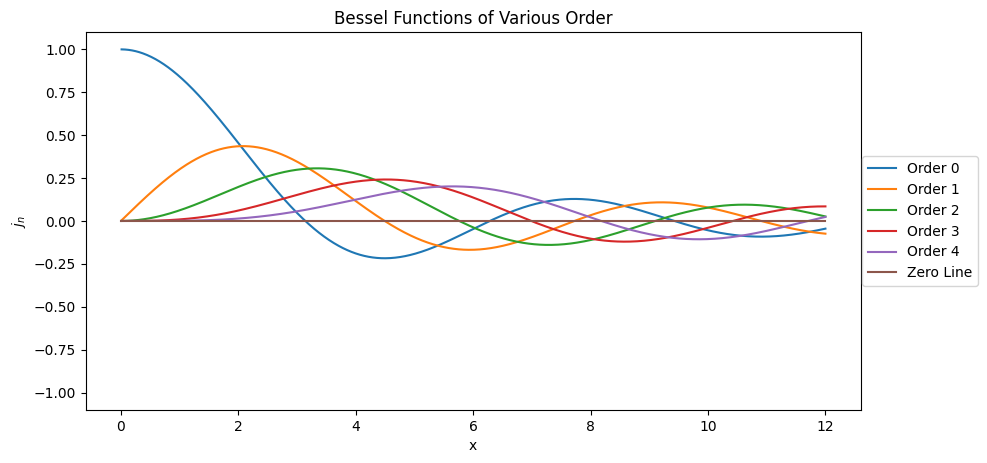

In [239]:
#Plot
xvals = np.linspace(x1,x2,1000)
O = np.linspace(0,orders,orders+1)
plt.figure(figsize=(10,5))
for i in O:
    yvals = f(xvals,i)
    plt.plot(xvals,yvals, label="Order {:1.0f}" .format(i) )

plt.plot(xvals,np.zeros_like(xvals), label="Zero Line")
plt.ylim(-1.1,1.1)
plt.xlabel("x")
plt.ylabel("$j_n$")
plt.title("Bessel Functions of Various Order")
plt.legend(loc='right', bbox_to_anchor=(1.16, 0.5))
plt.show()

## Find the roots

Now we want to find the zeros of this function. In this notebook I tested each method from class to compare them. I did have to adapt the root finding algorithms slightly. For one I needed to add in the order of the Bessel function. I also needed to adjust some things to allow the tangent and secant methods to be animated.

In [268]:
print(" Methods to Find Zeros of Bessel Functions")
print("__________________________________________")

#Various Parameters Needed
n=0
xstart = 2
dx = 0.1
acc = 1e-6


label1='simple'
answer1,iterations1 = root_simple(f,n, xstart, dx, acc,1000,True)

print(" ")
print("____________________________________________________________________________________")
label2='bisection'
answer2,iterations2 = root_bisection(f,n, xstart, 4, acc,1000,True)

print(" ")
print("____________________________________________________________________________________")
label3='tangent'
answer3,iterations3 = root_tangent(f, g, n, xstart, acc,1000,True)

print(" ")
print("____________________________________________________________________________________")
label4='secant'
answer4,iterations4 = root_secant(f, n, xstart, 4, acc,1000,True)


 Methods to Find Zeros of Bessel Functions
__________________________________________

 Method: Simple Search
 Accuracy: 1e-06
 Step     Root Guess          Step Size           Function Val
 ----  --------------------  --------------------  --------------------
    0  2                     0.1                   0.4546487134128413  
    1  2.1                   0.1                   0.41105207935660704 
    2  2.2                   0.1                   0.36749836537254127 
    3  2.3000000000000003    0.1                   0.3242196574681395  
    4  2.4000000000000004    0.1                   0.2814429918963133  
    5  2.5000000000000004    0.1                   0.23938885764158227 
    6  2.6000000000000005    0.1                   0.1982697583928706  
    7  2.7000000000000006    0.1                   0.1582888445310467  
    8  2.8000000000000007    0.1                   0.11963862505567903 
    9  2.900000000000001     0.1                   0.08249976869447659 
   10  3.000000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


From the tables it's easiest to see which algorithm is fastest. Tangent wins in a land slide. We can see this in action with the various animations as well.

### Animations of Route Finding

### Simple Search:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


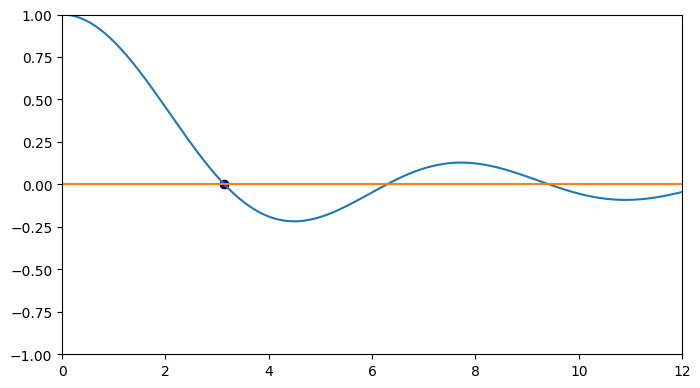

In [243]:
anim1 = AnimatedScatter(iterations=iterations1,x1=x1,x2=x2,y1=y1,y2=y2,
                       color=1,label=label1,xplot=xvals,yplot=f(xvals,0));
HTML(anim1.ani.to_html5_video())

### Bisection:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


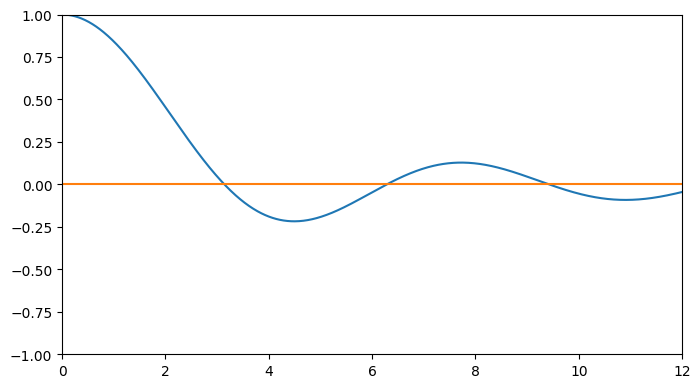

In [244]:
anim2 = AnimatedScatter(iterations=iterations2,x1=x1,x2=x2,y1=y1,y2=y2,
                       color=2,label=label2,xplot=xvals,yplot=f(xvals,0))
HTML(anim2.ani.to_html5_video())

### Tangent:

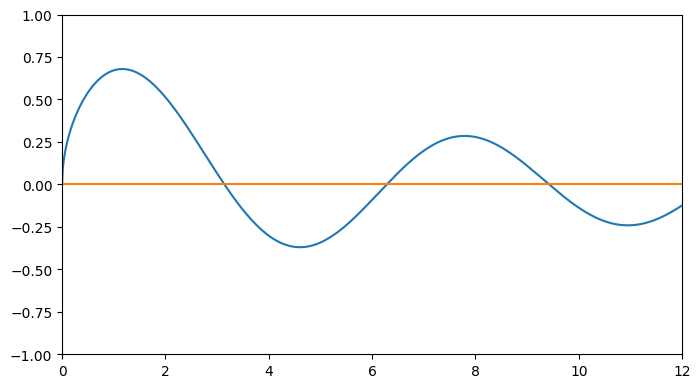

In [207]:
anim3 = AnimatedScatter(iterations=iterations3,x1=x1,x2=x2,y1=y1,y2=y2,
                       color=2,label=label2,xplot=xvals,yplot=f(xvals,0))
HTML(anim3.ani.to_html5_video())

### Secant:

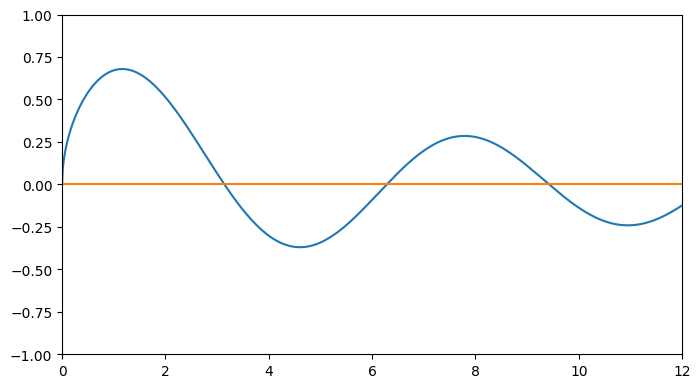

In [215]:
anim4 = AnimatedScatter(iterations=iterations4,x1=x1,x2=x2,y1=y1,y2=y2,
                       color=2,label=label2,xplot=xvals,yplot=f(xvals,0));
HTML(anim4.ani.to_html5_video())

## Usefulness of this Root Finding
Please see the computational section of write up for context on this section of my implementation.

In [273]:
#First we need to calculate a decent starting point
zero_wanted=9
order=9
start_point = ((zero_wanted+1)*pi-order*pi/2)

print("Guess:", start_point)
#Then we calculate the zero using our most effective method
answer5,iterations5 = root_tangent(f, g, order, start_point, 1e-14,1000,True)

Guess: 17.27875959474386

 Method: Tangent Search
 Accuracy: 1e-14
 Step     Root Guess          Step Size           Function Val
 ----  --------------------  --------------------  --------------------
    0  17.27875959474386     0.594609633751574     -0.028751444589155257
    1  17.873369228495434    0.594609633751574     0.0017891481218408392
    2  17.838599386652252    -0.034769841843181125  -2.262028406982339e-06
    3  17.83864319915154     4.38124992892527e-05  -2.7767415008235288e-12
    4  17.838643199205322    5.37820094399437e-11  -1.1317042651405366e-16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


In [274]:
#Test 2
zero_wanted=12
order=6
start_point = ((zero_wanted+1)*pi-order*pi/2)

print("Guess:", start_point)
answer5,iterations5 = root_tangent(f, g, order, start_point, 1e-14,1000,True)

Guess: 31.415926535897935

 Method: Tangent Search
 Accuracy: 1e-14
 Step     Root Guess          Step Size           Function Val
 ----  --------------------  --------------------  --------------------
    0  31.415926535897935    -0.8215269641232067   -0.019994747279315675
    1  30.594399571774726    -0.8215269641232067   0.004381538608996158
    2  30.730881935103152    0.13648236332842775   -1.6125315846417436e-05
    3  30.73038072751934     -0.0005012075838124403  1.3279091898910824e-10
    4  30.73038073164665     4.127310129512403e-09  -5.3889242806930494e-17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


In [275]:
#Test 3
zero_wanted=30
order=16
start_point = ((zero_wanted+1)*pi-order*pi/2)

print("Guess:", start_point)
answer5,iterations5 = root_tangent(f, g, order, start_point, 1e-14,1000,True)

Guess: 72.25663103256524

 Method: Tangent Search
 Accuracy: 1e-14
 Step     Root Guess          Step Size           Function Val
 ----  --------------------  --------------------  --------------------
    0  72.25663103256524     3.0358652670916326    -0.013316081537578081
    1  75.29249629965688     3.0358652670916326    0.013319914050059315
    2  82.36386583760904     7.071369537952169     0.008820219316760592
    3  83.41298399769123     1.049118160082188     -0.0027094806251236063
    4  83.17843280005718     -0.23455119763405288  5.141019252686442e-05
    5  83.18275202397137     0.004319223914193544  1.0276075730687012e-09
    6  83.18275211031171     8.634033311206448e-08  1.5360172837301487e-16
    7  83.18275211031172     1.2905728570449557e-14  9.076465767496442e-18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  
